In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Consistent plot size
from pylab import rcParams
rcParams['figure.figsize'] = (16,8)

# handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# time series related imports
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima


In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + VISITOR ATTENTION INDEX +TOPIC AND SENTIMENT INTENSITY - DATA COMPOSITION 3 (90-5-5).csv', index_col="Month", parse_dates=True)
df.head()

,Tourist Arrival,NegativityQDAP,PositivityQDAP,TOPIC 1,TOPIC 2,TOPIC 3,TOPIC 4,TOPIC 5,TOPIC 6,TOPIC 7,...,Hoi An,Vietnam weather,Visa for Vietnam,Sgn airport,Phu Quoc,Vietnam itinerary,Vietnam trip,Things to do in Hue,Vietnam backpackers,Class
Month,,,,,,,,,,,,,,,,,,,,,
2008-01-01,399556,0.181818,0.090909,0.008715,0.010894,0.889993,0.011228,0.010641,0.001710,0.014932,...,27,58,29,18,20,0,32,0,8,Train
2008-01-02,411032,0.000000,0.090909,0.009085,0.010974,0.007221,0.006829,0.006410,0.005451,0.011673,...,27,58,31,10,19,5,39,7,5,Train
2008-01-03,414332,0.142857,0.000000,0.008164,0.005849,0.006917,0.009097,0.007196,0.001611,0.007281,...,27,50,29,38,28,6,30,0,0,Train
2008-01-04,395900,0.214286,0.071429,0.007528,0.013789,0.005867,0.911020,0.012191,0.001259,0.014063,...,27,41,30,25,22,8,45,0,8,Train
2008-01-05,366387,0.000000,0.100000,0.008862,0.007257,0.010529,0.011619,0.014288,0.001458,0.015968,...,27,44,24,16,22,5,47,0,9,Train


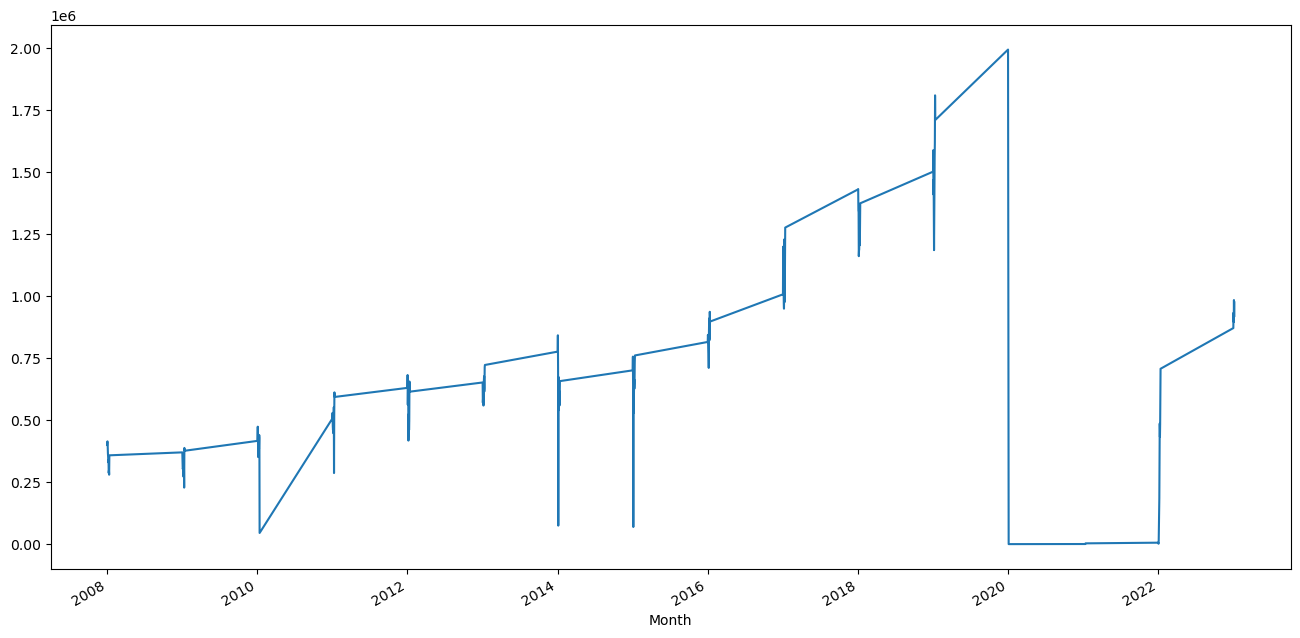

In [3]:
fig, ax = plt.subplots(figsize=(16,8))
ax = df['Tourist Arrival'].plot()
color_arr = ['g', 'r', 'm', 'b', 'y', 'k']
c_indx = 0
for x in df[df['Tourist Arrival']==1].index:
    ax.axvline(x=x, color=color_arr[c_indx], linewidth=0.5)
    if color_arr[c_indx] == 'k':
        c_indx = 0
    else:
        c_indx +=1

In [4]:
df1=df.drop(["Class"], axis=1)
print(df1)

            Tourist Arrival  NegativityQDAP  PositivityQDAP   TOPIC 1  \
Month                                                                   
2008-01-01           399556        0.181818        0.090909  0.008715   
2008-01-02           411032        0.000000        0.090909  0.009085   
2008-01-03           414332        0.142857        0.000000  0.008164   
2008-01-04           395900        0.214286        0.071429  0.007528   
2008-01-05           366387        0.000000        0.100000  0.008862   
...                     ...             ...             ...       ...   
2023-01-02           932969        0.000000        0.181818  0.014135   
2023-01-03           895425        0.000000        0.142857  0.007677   
2023-01-04           984146        0.000000        0.222222  0.014135   
2023-01-05           916257        0.000000        0.125000  0.014135   
2023-01-06           975010        0.000000        0.111111  0.012180   

             TOPIC 2   TOPIC 3   TOPIC 4   TOPIC 5

In [5]:
auto_arima(df1['Tourist Arrival'], m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4947.042, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4937.754, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4938.437, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4945.121, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4948.808, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=4939.754, Time=0.25 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=4939.754, Time=0.23 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=4938.184, Time=0.10 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=4940.975, Time=0.51 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=4935.707, Time=0.07 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=4937.707, Time=0.19 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=4937.707, Time=0.17 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=4936.131, Time=0.05 sec
 ARIMA(0,1,0)(2,0,1)[12]

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [6]:
train = df1['Tourist Arrival'][:'01/12/2021'].dropna()
test = df1['Tourist Arrival']['01/01/2022':].dropna()
exog_train = df1.drop(['Tourist Arrival'], axis=1)[:'01/12/2021'].dropna()
exog_test = df1.drop(['Tourist Arrival'], axis=1)['01/01/2022':].dropna()

In [7]:
import statsmodels.api as sm
model = SARIMAX(train,order=(0,1,0),seasonal_order=(1,0,0,12),exog = exog_train,
                                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()
results.summary()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           33     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20374D+01    |proj g|=  6.21245D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   33      0      1      0     0     0   6.212D-06   1.204D+01
  F =   12.037386882945615     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    Tourist Arrival   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood               -2022.281
Date:                            Wed, 23 Aug 2023   AIC                           4110.562
Time:                                    22:19:12   BIC                           4210.995
Sample:                                         0   HQIC                          4151.356
                                            - 168                                         
Covariance Type:                              opg                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
NegativityQDAP           1.574e+05   1.12e+05      1.412      0.158   -6.12e+04    3.76e+05
PositivityQDAP           1.733e+05   1.24e+05      1.399      0.162   -6.95e+04    4.16e+05
TOPIC 1                 -1.314e+05   9.59e+04     -1.370      0.171   -3.19e+05    5.66e+04
TOPIC 2                 -1.232e+05   5.69e+04     -2.166      0.030   -2.35e+05   -1.17e+04
TOPIC 3                 -3.525e+04   5.92e+04     -0.595      0.552   -1.51e+05    8.08e+04
TOPIC 4                 -5.301e+04   4.06e+04     -1.306      0.192   -1.33e+05    2.66e+04
TOPIC 5                  1.086e+04   5.02e+04      0.216      0.829   -8.76e+04    1.09e+05
TOPIC 6                 -1.416e+04   1.16e+05     -0.122      0.903   -2.42e+05    2.14e+05
TOPIC 7                 -4.931e+04   4.17e+04     -1.183      0.237   -1.31e+05    3.24e+04
TOPIC 8                 -4.286e+04   4.36e+04     -0.983      0.326   -1.28e+05    4.26e+04
TOPIC 9                 -7.433e+04   4.39e+04     -1.691      0.091    -1.6e+05    1.18e+04
TOPIC 10                -4.839e+04   5.97e+04     -0.810      0.418   -1.65e+05    6.87e+04
Airbnb Vietnam          -1186.9799   2540.573     -0.467      0.640   -6166.412    3792.452
Vietnam restaurant       2833.1963   2830.961      1.001      0.317   -2715.385    8381.777
Shopping in Hanoi         964.3618   2747.764      0.351      0.726   -4421.156    6349.880
Shopping in Ho Chi Minh   858.4856   3114.432      0.276      0.783   -5245.689    6962.660
 Vietnam tour             -69.6824   3591.107     -0.019      0.985   -7108.122    6968.758
 Skyscanner              3860.7027   3745.969      1.031      0.303   -3481.262    1.12e+04
 Vietnam visa            3272.9503   3837.746      0.853      0.394   -4248.894    1.08e+04
 Vietnam airport         1715.2546   3640.409      0.471      0.638   -5419.817    8850.326
 Vietnam flights        -3182.1424   3236.646     -0.983      0.326   -9525.851    3161.567
 Danang airport          -517.8823   1691.074     -0.306      0.759   -3832.326    2796.561
 Hoi An                 -2696.3721   2257.660     -1.194      0.232   -7121.304    1728.559
 Vietnam weather          596.7591   2207.602      0.270      0.787   -3730.062    4923.580
 Visa for Vietnam        4541.7245   4176.818      1.087      0.277   -3644.688    1.27e+04
 Sgn airport             1039.5164   2033.578      0.511      0.609   -2946.223    5025.255
 Phu Quoc                3897.4045   2320.707      1.679      0.093    -651.099    8445.907
 Vietnam itinerary      -1083.3074   2527.043     -0.429      0.668   -6036.220    3869.605
 Vietnam trip            4920.5059   2445.375      2.012      0.044     127.659    9713.352
 Things to do in Hue     3744.5472   3576.641      1.047      0.295   -3265.540    1.08e+04
 Vietnam backpackers    -6018.7777   3419.350     -1.760      0.078   -1.27e+04     683.025
ar.S.

In [8]:
start = len(train)
end = len(train) + len(test) - 1
y_pred = results.predict(start=start,end=end, exog = exog_test, dynamic=False).rename('SARIMA(0,1,0)(1,0,[0],12) Predictions')

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [9]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [10]:
RMSE = np.sqrt(mean_squared_error(test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 326013.1089660345


In [11]:
MAE = mean_absolute_error(test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 301238.9531273046


In [12]:
MAPE = mean_absolute_percentage_error(test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 13.743827618585662


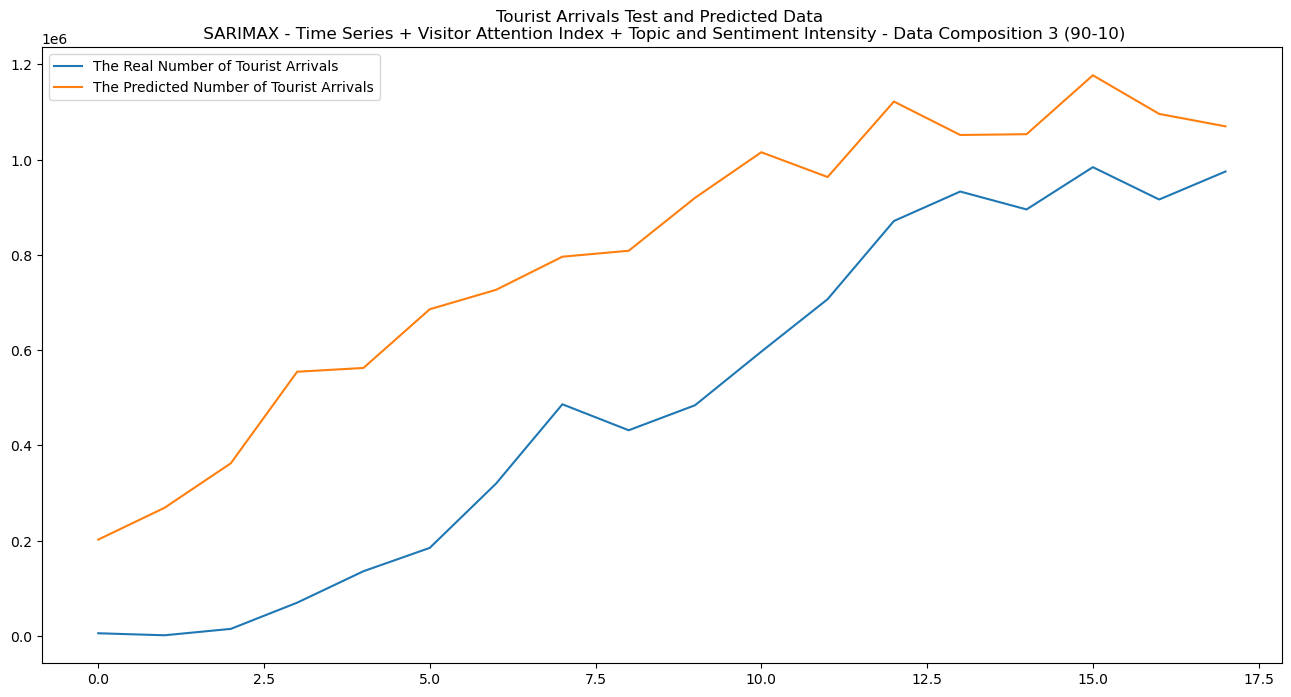

In [13]:
x_ax = range(len(test))
plt.plot(x_ax, test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n SARIMAX - Time Series + Visitor Attention Index + Topic and Sentiment Intensity - Data Composition 3 (90-10)")
plt.legend()
plt.show()